In [1]:
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
import os
import sys
sys.path.append("../")
import random
from aif360.algorithms.inprocessing.gerryfair_classifier import *
from aif360.algorithms.inprocessing.gerryfair.clean import *
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import *
from aif360.algorithms.inprocessing.gerryfair.auditor import *
from sklearn import svm
from sklearn import tree
from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
import pickle
import matplotlib.pyplot as plt
import random
import pdb



We first demonstrate how to instantiate a `Model`, `train` it with respect to rich subgroup fairness, and `predict` the label of a new example. We remark that when we set the `print_flag = True` at each iteration of the algorithm we print the error, fairness violation, and violated group size of most recent model. The error is the classification error of the classifier. At each round the Learner tries to find a classifier that minimizes the classification error plus a weighted sum of the fairness disparities on all the groups that the Auditor has found up until that point. By contrast the Auditor tries to find the group at each round with the greatest rich subgroup disparity with respect to the Learner's model. We define `violated group size` as the size (as a fraction of the dataset size) of this group, and the `fairness violation` as the `violated group size` times the difference in the statistical rate (FP or FN rate) on the group vs. the whole population. 

In the example below we set `max_iterations=5000` which is in-line with time to convergence observed in [the rich subgroup fairness empirical paper](https://arxiv.org/abs/1808.08166), but advise that this can be highly dataset dependent. Our target $\gamma$-disparity is `gamma = .001`, our statistical rate is false positive rate or `FP`, and our weighted regression oracle is linear regression. We observe that the unconstrained (with no fairness constraint) classifier has error $.185$ and $\gamma$-disparity $.022$. After $5000$ iterations we obtain a classifier that $\gamma$-fair, and has error $.230$. We note that we converge to a fair, and almost as accurate classifier after just a hundred iterations.


In [5]:
random.seed(10)
C = 100
print_flag = True
gamma = .005
max_iterations = 3000

fair_model = Model(C=C, printflag=print_flag, gamma=gamma, fairness_def='FP',
             max_iters=max_iterations, heatmapflag=False, heatmap_iter=max_iterations)
# balance flag artificially ensures mean(y) = .5
data_set = load_preproc_data_adult(sub_samp=200, balance=True)

# fit method
communities_all_errors, communities_violations = fair_model.fit(data_set,
                                                 early_termination=True, return_values=True)
# predict method
dataset_yhat = fair_model.predict(data_set)



iteration: 1
most accurate classifier error: 0.245, most accurate class unfairness: 0.038950000000000005, violated group size: 0.245
iteration: 2
error: 0.3475, fairness violation: 0.019475000000000003, violated group size: 0.245
iteration: 3
error: 0.3816666666666667, fairness violation: 0.012983333333333336, violated group size: 0.255
iteration: 4
error: 0.39875, fairness violation: 0.009737500000000001, violated group size: 0.245
iteration: 5
error: 0.40900000000000003, fairness violation: 0.007790000000000002, violated group size: 0.255
iteration: 6
error: 0.4158333333333333, fairness violation: 0.00649166666666667, violated group size: 0.255
iteration: 7
error: 0.4207142857142856, fairness violation: 0.005564285714285717, violated group size: 0.245
iteration: 8
error: 0.424375, fairness violation: 0.004868750000000002, violated group size: 0.245
iteration: 9
error: 0.4272222222222223, fairness violation: 0.0043277777777777785, violated group size: 0.255
iteration: 10
error: 0.4295

iteration: 77
error: 0.4027922077922078, fairness violation: 0.0021285714285714285, violated group size: 0.255
iteration: 78
error: 0.4025000000000001, fairness violation: 0.0021339743589743583, violated group size: 0.245
iteration: 79
error: 0.4021518987341773, fairness violation: 0.0021392405063291133, violated group size: 0.255
iteration: 80
error: 0.40181249999999996, fairness violation: 0.002144375, violated group size: 0.245
iteration: 81
error: 0.40148148148148144, fairness violation: 0.0021493827160493826, violated group size: 0.255
iteration: 82
error: 0.40115853658536593, fairness violation: 0.002154268292682927, violated group size: 0.245
iteration: 83
error: 0.4008433734939759, fairness violation: 0.002159036144578313, violated group size: 0.245
iteration: 84
error: 0.4001190476190477, fairness violation: 0.0022244047619047616, violated group size: 0.245
iteration: 85
error: 0.3994117647058824, fairness violation: 0.0022882352941176465, violated group size: 0.245
iteration:

iteration: 151
error: 0.3705298013245034, fairness violation: 0.0046317880794702, violated group size: 0.245
iteration: 152
error: 0.37026315789473685, fairness violation: 0.0046516447368421055, violated group size: 0.245
iteration: 153
error: 0.37, fairness violation: 0.004671241830065359, violated group size: 0.255
iteration: 154
error: 0.36974025974025976, fairness violation: 0.004690584415584415, violated group size: 0.255
iteration: 155
error: 0.369483870967742, fairness violation: 0.004709677419354841, violated group size: 0.245
iteration: 156
error: 0.36923076923076925, fairness violation: 0.004728525641025641, violated group size: 0.245
iteration: 157
error: 0.36898089171974524, fairness violation: 0.0047471337579617825, violated group size: 0.255
iteration: 158
error: 0.3687341772151899, fairness violation: 0.004765506329113924, violated group size: 0.255
iteration: 159
error: 0.36849056603773583, fairness violation: 0.004783647798742137, violated group size: 0.255
iteration: 

iteration: 226
error: 0.36639380530973453, fairness violation: 0.004595353982300882, violated group size: 0.245
iteration: 227
error: 0.36645374449339213, fairness violation: 0.004586343612334799, violated group size: 0.255
iteration: 228
error: 0.3665131578947369, fairness violation: 0.004577412280701751, violated group size: 0.255
iteration: 229
error: 0.3665720524017468, fairness violation: 0.004568558951965063, violated group size: 0.255
iteration: 230
error: 0.3666304347826088, fairness violation: 0.00455978260869565, violated group size: 0.245
iteration: 231
error: 0.36668831168831184, fairness violation: 0.004551082251082249, violated group size: 0.245
iteration: 232
error: 0.36674568965517246, fairness violation: 0.004542456896551721, violated group size: 0.255
iteration: 233
error: 0.3668025751072962, fairness violation: 0.004533905579399139, violated group size: 0.255
iteration: 234
error: 0.36685897435897447, fairness violation: 0.004525427350427347, violated group size: 0.2

iteration: 300
error: 0.36716666666666675, fairness violation: 0.004362833333333333, violated group size: 0.255
iteration: 301
error: 0.36705980066445193, fairness violation: 0.00437375415282392, violated group size: 0.245
iteration: 302
error: 0.366953642384106, fairness violation: 0.0043846026490066215, violated group size: 0.245
iteration: 303
error: 0.36684818481848197, fairness violation: 0.004395379537953794, violated group size: 0.255
iteration: 304
error: 0.3667434210526316, fairness violation: 0.004406085526315789, violated group size: 0.255
iteration: 305
error: 0.36663934426229516, fairness violation: 0.004416721311475409, violated group size: 0.255
iteration: 306
error: 0.36653594771241843, fairness violation: 0.004427287581699345, violated group size: 0.255
iteration: 307
error: 0.3664332247557004, fairness violation: 0.0044377850162866436, violated group size: 0.255
iteration: 308
error: 0.3663311688311689, fairness violation: 0.0044482142857142845, violated group size: 0

iteration: 374
error: 0.3608021390374333, fairness violation: 0.005013235294117646, violated group size: 0.245
iteration: 375
error: 0.36073333333333335, fairness violation: 0.005020266666666666, violated group size: 0.245
iteration: 376
error: 0.36066489361702136, fairness violation: 0.005027260638297871, violated group size: 0.255
iteration: 377
error: 0.3605968169761274, fairness violation: 0.0050342175066313, violated group size: 0.255
iteration: 378
error: 0.3605291005291006, fairness violation: 0.005041137566137566, violated group size: 0.255
iteration: 379
error: 0.3604617414248022, fairness violation: 0.005048021108179419, violated group size: 0.245
iteration: 380
error: 0.3603947368421053, fairness violation: 0.005054868421052631, violated group size: 0.245
iteration: 381
error: 0.3603412073490814, fairness violation: 0.005061679790026245, violated group size: 0.245
iteration: 382
error: 0.3603795811518325, fairness violation: 0.005055104712041884, violated group size: 0.245
i

iteration: 448
error: 0.3632589285714286, fairness violation: 0.004686049107142853, violated group size: 0.255
iteration: 449
error: 0.36329621380846333, fairness violation: 0.004681291759465476, violated group size: 0.245
iteration: 450
error: 0.36333333333333334, fairness violation: 0.004676555555555553, violated group size: 0.245
iteration: 451
error: 0.36337028824833717, fairness violation: 0.004671840354767179, violated group size: 0.255
iteration: 452
error: 0.36340707964601776, fairness violation: 0.004667146017699112, violated group size: 0.255
iteration: 453
error: 0.36344370860927167, fairness violation: 0.004662472406181011, violated group size: 0.255
iteration: 454
error: 0.3634801762114538, fairness violation: 0.004657819383259908, violated group size: 0.245
iteration: 455
error: 0.3635164835164836, fairness violation: 0.00465318681318681, violated group size: 0.255
iteration: 456
error: 0.36355263157894746, fairness violation: 0.004648574561403505, violated group size: 0.

iteration: 522
error: 0.3632854406130269, fairness violation: 0.004627490421455935, violated group size: 0.245
iteration: 523
error: 0.3632313575525813, fairness violation: 0.004633269598470358, violated group size: 0.255
iteration: 524
error: 0.36317748091603064, fairness violation: 0.004639026717557247, violated group size: 0.255
iteration: 525
error: 0.36312380952380957, fairness violation: 0.004644761904761901, violated group size: 0.245
iteration: 526
error: 0.36307034220532325, fairness violation: 0.004650475285171099, violated group size: 0.255
iteration: 527
error: 0.36301707779886155, fairness violation: 0.0046561669829221965, violated group size: 0.255
iteration: 528
error: 0.36296401515151516, fairness violation: 0.004661837121212117, violated group size: 0.255
iteration: 529
error: 0.36291115311909267, fairness violation: 0.004667485822306235, violated group size: 0.245
iteration: 530
error: 0.3628584905660378, fairness violation: 0.0046731132075471665, violated group size:

iteration: 596
error: 0.359773489932886, fairness violation: 0.005002768456375836, violated group size: 0.255
iteration: 597
error: 0.3597319932998325, fairness violation: 0.005007202680066999, violated group size: 0.255
iteration: 598
error: 0.3596906354515051, fairness violation: 0.005011622073578592, violated group size: 0.255
iteration: 599
error: 0.3596494156928214, fairness violation: 0.005016026711185306, violated group size: 0.255
iteration: 600
error: 0.3596083333333333, fairness violation: 0.0050204166666666635, violated group size: 0.245
iteration: 601
error: 0.3595673876871881, fairness violation: 0.005024792013311146, violated group size: 0.255
iteration: 602
error: 0.3595265780730898, fairness violation: 0.005029152823920264, violated group size: 0.245
iteration: 603
error: 0.35948590381426215, fairness violation: 0.005033499170812601, violated group size: 0.255
iteration: 604
error: 0.3594453642384107, fairness violation: 0.005037831125827811, violated group size: 0.255


iteration: 670
error: 0.36138805970149257, fairness violation: 0.004800373134328357, violated group size: 0.255
iteration: 671
error: 0.36141579731743667, fairness violation: 0.0047970193740685535, violated group size: 0.255
iteration: 672
error: 0.36144345238095243, fairness violation: 0.004793675595238094, violated group size: 0.255
iteration: 673
error: 0.36147102526002983, fairness violation: 0.004790341753343237, violated group size: 0.255
iteration: 674
error: 0.3614985163204748, fairness violation: 0.004787017804154302, violated group size: 0.255
iteration: 675
error: 0.36152592592592603, fairness violation: 0.004783703703703703, violated group size: 0.245
iteration: 676
error: 0.36155325443786984, fairness violation: 0.004780399408284023, violated group size: 0.255
iteration: 677
error: 0.36158050221565735, fairness violation: 0.004777104874446084, violated group size: 0.255
iteration: 678
error: 0.36160766961651925, fairness violation: 0.004773820058997048, violated group size

iteration: 744
error: 0.36240591397849464, fairness violation: 0.004645094086021504, violated group size: 0.255
iteration: 745
error: 0.36237583892617453, fairness violation: 0.0046491275167785204, violated group size: 0.245
iteration: 746
error: 0.3623458445040215, fairness violation: 0.004653150134048256, violated group size: 0.255
iteration: 747
error: 0.36231593038821963, fairness violation: 0.004657161981258365, violated group size: 0.245
iteration: 748
error: 0.36228609625668456, fairness violation: 0.004661163101604276, violated group size: 0.245
iteration: 749
error: 0.3622496662216288, fairness violation: 0.004665153538050732, violated group size: 0.255
iteration: 750
error: 0.3622133333333334, fairness violation: 0.004669133333333332, violated group size: 0.245
iteration: 751
error: 0.3621770972037284, fairness violation: 0.00467310252996005, violated group size: 0.255
iteration: 752
error: 0.36214095744680863, fairness violation: 0.004677061170212763, violated group size: 0.

iteration: 818
error: 0.35995110024449894, fairness violation: 0.004916931540342294, violated group size: 0.255
iteration: 819
error: 0.35992063492063503, fairness violation: 0.004920268620268616, violated group size: 0.245
iteration: 820
error: 0.3598902439024391, fairness violation: 0.004923597560975605, violated group size: 0.255
iteration: 821
error: 0.3598599269183923, fairness violation: 0.0049269183922046236, violated group size: 0.245
iteration: 822
error: 0.359829683698297, fairness violation: 0.0049302311435523065, violated group size: 0.255
iteration: 823
error: 0.35979951397326865, fairness violation: 0.004933535844471441, violated group size: 0.255
iteration: 824
error: 0.3597694174757282, fairness violation: 0.00493683252427184, violated group size: 0.255
iteration: 825
error: 0.3597393939393941, fairness violation: 0.004940121212121208, violated group size: 0.255
iteration: 826
error: 0.35970944309927366, fairness violation: 0.004943401937046001, violated group size: 0.2

iteration: 892
error: 0.35978139013452926, fairness violation: 0.004926401345291477, violated group size: 0.255
iteration: 893
error: 0.3598040313549833, fairness violation: 0.004923740201567749, violated group size: 0.245
iteration: 894
error: 0.35982662192393744, fairness violation: 0.0049210850111856795, violated group size: 0.255
iteration: 895
error: 0.35984916201117323, fairness violation: 0.004918435754189941, violated group size: 0.255
iteration: 896
error: 0.3598716517857144, fairness violation: 0.004915792410714284, violated group size: 0.245
iteration: 897
error: 0.3598940914158307, fairness violation: 0.004913154960981046, violated group size: 0.245
iteration: 898
error: 0.35991648106904245, fairness violation: 0.004910523385300665, violated group size: 0.255
iteration: 899
error: 0.3599388209121247, fairness violation: 0.0049078976640711865, violated group size: 0.245
iteration: 900
error: 0.3599611111111112, fairness violation: 0.004905277777777776, violated group size: 0

iteration: 966
error: 0.361164596273292, fairness violation: 0.004744358178053829, violated group size: 0.255
iteration: 967
error: 0.36117890382626683, fairness violation: 0.00474208893485005, violated group size: 0.255
iteration: 968
error: 0.3611931818181818, fairness violation: 0.004739824380165289, violated group size: 0.245
iteration: 969
error: 0.3612074303405573, fairness violation: 0.0047375644994840024, violated group size: 0.255
iteration: 970
error: 0.36122164948453617, fairness violation: 0.0047353092783505146, violated group size: 0.255
iteration: 971
error: 0.3612358393408857, fairness violation: 0.00473305870236869, violated group size: 0.255
iteration: 972
error: 0.36125000000000007, fairness violation: 0.004730812757201646, violated group size: 0.245
iteration: 973
error: 0.3612641315519014, fairness violation: 0.0047285714285714275, violated group size: 0.255
iteration: 974
error: 0.3612782340862423, fairness violation: 0.004726334702258727, violated group size: 0.25

iteration: 1040
error: 0.3604711538461538, fairness violation: 0.004813798076923076, violated group size: 0.255
iteration: 1041
error: 0.36044668587896245, fairness violation: 0.004816522574447645, violated group size: 0.255
iteration: 1042
error: 0.36042226487523993, fairness violation: 0.004819241842610363, violated group size: 0.255
iteration: 1043
error: 0.36039789069990413, fairness violation: 0.004821955896452541, violated group size: 0.245
iteration: 1044
error: 0.36037356321839087, fairness violation: 0.004824664750957853, violated group size: 0.245
iteration: 1045
error: 0.3603492822966507, fairness violation: 0.004827368421052629, violated group size: 0.255
iteration: 1046
error: 0.36032504780114727, fairness violation: 0.004830066921606117, violated group size: 0.255
iteration: 1047
error: 0.3603008595988539, fairness violation: 0.004832760267430752, violated group size: 0.255
iteration: 1048
error: 0.3602767175572519, fairness violation: 0.004835448473282441, violated group

iteration: 1114
error: 0.3587791741472173, fairness violation: 0.005002199281867145, violated group size: 0.255
iteration: 1115
error: 0.3587578475336323, fairness violation: 0.00500457399103139, violated group size: 0.255
iteration: 1116
error: 0.35873655913978486, fairness violation: 0.005006944444444443, violated group size: 0.255
iteration: 1117
error: 0.35871530886302594, fairness violation: 0.0050093106535362576, violated group size: 0.245
iteration: 1118
error: 0.3586940966010734, fairness violation: 0.005011672629695885, violated group size: 0.245
iteration: 1119
error: 0.35867292225201075, fairness violation: 0.00501403038427167, violated group size: 0.255
iteration: 1120
error: 0.35865178571428574, fairness violation: 0.005016383928571429, violated group size: 0.255
iteration: 1121
error: 0.3586306868867083, fairness violation: 0.005018733273862621, violated group size: 0.255
iteration: 1122
error: 0.35860962566844923, fairness violation: 0.00502107843137255, violated group s

iteration: 1188
error: 0.3596675084175084, fairness violation: 0.004896675084175086, violated group size: 0.255
iteration: 1189
error: 0.3596846089150547, fairness violation: 0.004894701429772917, violated group size: 0.255
iteration: 1190
error: 0.3597016806722689, fairness violation: 0.004892731092436975, violated group size: 0.255
iteration: 1191
error: 0.35971872376154496, fairness violation: 0.004890764063811923, violated group size: 0.255
iteration: 1192
error: 0.3597357382550335, fairness violation: 0.00488880033557047, violated group size: 0.245
iteration: 1193
error: 0.35975272422464377, fairness violation: 0.004886839899413245, violated group size: 0.255
iteration: 1194
error: 0.3597696817420435, fairness violation: 0.004884882747068678, violated group size: 0.245
iteration: 1195
error: 0.359786610878661, fairness violation: 0.004882928870292887, violated group size: 0.245
iteration: 1196
error: 0.3598035117056856, fairness violation: 0.004880978260869566, violated group size

iteration: 1262
error: 0.36061806656101425, fairness violation: 0.004759072900158478, violated group size: 0.245
iteration: 1263
error: 0.36062945368171023, fairness violation: 0.004757323832145683, violated group size: 0.255
iteration: 1264
error: 0.3606408227848101, fairness violation: 0.004755577531645568, violated group size: 0.245
iteration: 1265
error: 0.36065217391304344, fairness violation: 0.00475383399209486, violated group size: 0.255
iteration: 1266
error: 0.36066350710900474, fairness violation: 0.0047520932069510255, violated group size: 0.255
iteration: 1267
error: 0.3606748224151539, fairness violation: 0.004750355169692183, violated group size: 0.255
iteration: 1268
error: 0.3606861198738171, fairness violation: 0.0047486198738170326, violated group size: 0.255
iteration: 1269
error: 0.3606973995271867, fairness violation: 0.004746887312844758, violated group size: 0.255
iteration: 1270
error: 0.3607086614173227, fairness violation: 0.004745157480314961, violated group

iteration: 1336
error: 0.3597679640718563, fairness violation: 0.00485812125748503, violated group size: 0.245
iteration: 1337
error: 0.3597494390426328, fairness violation: 0.004860209424083769, violated group size: 0.255
iteration: 1338
error: 0.35973094170403586, fairness violation: 0.004862294469357249, violated group size: 0.255
iteration: 1339
error: 0.35971247199402534, fairness violation: 0.004864376400298731, violated group size: 0.255
iteration: 1340
error: 0.3596940298507462, fairness violation: 0.004866455223880596, violated group size: 0.255
iteration: 1341
error: 0.3596756152125279, fairness violation: 0.004868530947054436, violated group size: 0.255
iteration: 1342
error: 0.35965722801788375, fairness violation: 0.004870603576751116, violated group size: 0.245
iteration: 1343
error: 0.35963886820551016, fairness violation: 0.004872673119880863, violated group size: 0.255
iteration: 1344
error: 0.3596205357142857, fairness violation: 0.0048747395833333325, violated group 

iteration: 1410
error: 0.3584680851063829, fairness violation: 0.005004645390070923, violated group size: 0.255
iteration: 1411
error: 0.35845145287030467, fairness violation: 0.005006520198440823, violated group size: 0.255
iteration: 1412
error: 0.3584348441926345, fairness violation: 0.005008392351274788, violated group size: 0.255
iteration: 1413
error: 0.3584182590233545, fairness violation: 0.0050102618542109, violated group size: 0.255
iteration: 1414
error: 0.3584016973125883, fairness violation: 0.005012128712871288, violated group size: 0.255
iteration: 1415
error: 0.3583851590106007, fairness violation: 0.005013992932862192, violated group size: 0.255
iteration: 1416
error: 0.35836864406779656, fairness violation: 0.005015854519774012, violated group size: 0.255
iteration: 1417
error: 0.3583521524347212, fairness violation: 0.00501771347918137, violated group size: 0.245
iteration: 1418
error: 0.358339210155148, fairness violation: 0.005019569816643162, violated group size: 

iteration: 1484
error: 0.3591913746630727, fairness violation: 0.004913173854447439, violated group size: 0.255
iteration: 1485
error: 0.3592020202020202, fairness violation: 0.00491158249158249, violated group size: 0.245
iteration: 1486
error: 0.3592126514131897, fairness violation: 0.004909993270524899, violated group size: 0.245
iteration: 1487
error: 0.35922326832548745, fairness violation: 0.004908406186953596, violated group size: 0.255
iteration: 1488
error: 0.3592338709677419, fairness violation: 0.004906821236559139, violated group size: 0.255
iteration: 1489
error: 0.35924445936870375, fairness violation: 0.004905238415043653, violated group size: 0.255
iteration: 1490
error: 0.3592550335570469, fairness violation: 0.0049036577181208055, violated group size: 0.255
iteration: 1491
error: 0.3592655935613682, fairness violation: 0.00490207914151576, violated group size: 0.255
iteration: 1492
error: 0.35927613941018754, fairness violation: 0.004900502680965146, violated group si

iteration: 1558
error: 0.35994223363286265, fairness violation: 0.004800930680359431, violated group size: 0.255
iteration: 1559
error: 0.35995189223861446, fairness violation: 0.004799486850545218, violated group size: 0.245
iteration: 1560
error: 0.35996153846153844, fairness violation: 0.0047980448717948685, violated group size: 0.255
iteration: 1561
error: 0.35997117232543246, fairness violation: 0.004796604740550926, violated group size: 0.255
iteration: 1562
error: 0.35998079385403337, fairness violation: 0.004795166453265042, violated group size: 0.255
iteration: 1563
error: 0.3599680102367242, fairness violation: 0.0047969929622520766, violated group size: 0.255
iteration: 1564
error: 0.3599552429667519, fairness violation: 0.004798817135549869, violated group size: 0.255
iteration: 1565
error: 0.3599424920127796, fairness violation: 0.004800638977635778, violated group size: 0.255
iteration: 1566
error: 0.3599297573435504, fairness violation: 0.004802458492975731, violated gro

iteration: 1632
error: 0.35899816176470595, fairness violation: 0.004917616421568625, violated group size: 0.255
iteration: 1633
error: 0.35898346601347214, fairness violation: 0.00491928965094917, violated group size: 0.245
iteration: 1634
error: 0.3589687882496941, fairness violation: 0.004920960832313338, violated group size: 0.245
iteration: 1635
error: 0.3589541284403669, fairness violation: 0.004922629969418956, violated group size: 0.255
iteration: 1636
error: 0.3589394865525673, fairness violation: 0.004924297066014667, violated group size: 0.245
iteration: 1637
error: 0.3589248625534514, fairness violation: 0.004925962125839947, violated group size: 0.255
iteration: 1638
error: 0.3589102564102564, fairness violation: 0.004927625152625149, violated group size: 0.245
iteration: 1639
error: 0.358895668090299, fairness violation: 0.004929286150091515, violated group size: 0.255
iteration: 1640
error: 0.35888109756097564, fairness violation: 0.004930945121951218, violated group siz

iteration: 1706
error: 0.35825322391559206, fairness violation: 0.005000263774912072, violated group size: 0.255
iteration: 1707
error: 0.35826596367896896, fairness violation: 0.004998828353837138, violated group size: 0.255
iteration: 1708
error: 0.3582786885245902, fairness violation: 0.004997394613583135, violated group size: 0.255
iteration: 1709
error: 0.35829139847864255, fairness violation: 0.0049959625511995275, violated group size: 0.255
iteration: 1710
error: 0.35830409356725146, fairness violation: 0.0049945321637426855, violated group size: 0.255
iteration: 1711
error: 0.3583167738164816, fairness violation: 0.004993103448275859, violated group size: 0.245
iteration: 1712
error: 0.35832943925233657, fairness violation: 0.004991676401869155, violated group size: 0.255
iteration: 1713
error: 0.35834208990075894, fairness violation: 0.004990251021599529, violated group size: 0.255
iteration: 1714
error: 0.35835472578763133, fairness violation: 0.004988827304550756, violated g

iteration: 1780
error: 0.35903089887640455, fairness violation: 0.0048983988764044915, violated group size: 0.245
iteration: 1781
error: 0.3590398652442449, fairness violation: 0.004897080291970799, violated group size: 0.255
iteration: 1782
error: 0.3590488215488216, fairness violation: 0.004895763187429851, violated group size: 0.255
iteration: 1783
error: 0.35905776780706683, fairness violation: 0.004894447560291641, violated group size: 0.245
iteration: 1784
error: 0.3590667040358745, fairness violation: 0.004893133408071745, violated group size: 0.255
iteration: 1785
error: 0.35907563025210093, fairness violation: 0.0048918207282913125, violated group size: 0.245
iteration: 1786
error: 0.35908454647256444, fairness violation: 0.004890509518477041, violated group size: 0.245
iteration: 1787
error: 0.35909345271404597, fairness violation: 0.004889199776161161, violated group size: 0.255
iteration: 1788
error: 0.35910234899328863, fairness violation: 0.004887891498881429, violated gr

iteration: 1854
error: 0.3595172599784251, fairness violation: 0.004826672060409922, violated group size: 0.255
iteration: 1855
error: 0.35950673854447446, fairness violation: 0.00482819407008086, violated group size: 0.255
iteration: 1856
error: 0.3594962284482759, fairness violation: 0.00482971443965517, violated group size: 0.245
iteration: 1857
error: 0.3594857296715132, fairness violation: 0.004831233171782443, violated group size: 0.255
iteration: 1858
error: 0.3594752421959096, fairness violation: 0.004832750269106563, violated group size: 0.255
iteration: 1859
error: 0.3594647660032275, fairness violation: 0.0048342657342657315, violated group size: 0.245
iteration: 1860
error: 0.3594543010752689, fairness violation: 0.004835779569892472, violated group size: 0.245
iteration: 1861
error: 0.35944384739387425, fairness violation: 0.004837291778613646, violated group size: 0.255
iteration: 1862
error: 0.35943340494092374, fairness violation: 0.00483880236305048, violated group siz

iteration: 1928
error: 0.35864626556016593, fairness violation: 0.004935036307053941, violated group size: 0.245
iteration: 1929
error: 0.3586340072576465, fairness violation: 0.004936443753240019, violated group size: 0.245
iteration: 1930
error: 0.35862176165803106, fairness violation: 0.004937849740932642, violated group size: 0.245
iteration: 1931
error: 0.3586095287415847, fairness violation: 0.0049392542723977195, violated group size: 0.245
iteration: 1932
error: 0.3585973084886129, fairness violation: 0.004940657349896479, violated group size: 0.255
iteration: 1933
error: 0.358585100879462, fairness violation: 0.004942058975685462, violated group size: 0.255
iteration: 1934
error: 0.35857290589451923, fairness violation: 0.004943459152016543, violated group size: 0.255
iteration: 1935
error: 0.3585607235142119, fairness violation: 0.0049448578811369485, violated group size: 0.255
iteration: 1936
error: 0.35854855371900823, fairness violation: 0.004946255165289255, violated group

iteration: 2002
error: 0.3580869130869131, fairness violation: 0.004997177822177821, violated group size: 0.255
iteration: 2003
error: 0.35809535696455314, fairness violation: 0.004995956065901146, violated group size: 0.255
iteration: 2004
error: 0.3581037924151696, fairness violation: 0.004994735528942115, violated group size: 0.255
iteration: 2005
error: 0.3581122194513716, fairness violation: 0.004993516209476308, violated group size: 0.255
iteration: 2006
error: 0.3581206380857428, fairness violation: 0.004992298105682949, violated group size: 0.255
iteration: 2007
error: 0.358129048330842, fairness violation: 0.004991081215744891, violated group size: 0.255
iteration: 2008
error: 0.3581374501992032, fairness violation: 0.004989865537848605, violated group size: 0.255
iteration: 2009
error: 0.3581458437033351, fairness violation: 0.004988651070184171, violated group size: 0.255
iteration: 2010
error: 0.3581542288557214, fairness violation: 0.004987437810945273, violated group size

iteration: 2076
error: 0.35868978805395, fairness violation: 0.0049099470134874755, violated group size: 0.255
iteration: 2077
error: 0.35869764082811756, fairness violation: 0.004908810784785749, violated group size: 0.255
iteration: 2078
error: 0.35870548604427327, fairness violation: 0.004907675649663138, violated group size: 0.255
iteration: 2079
error: 0.3587133237133237, fairness violation: 0.004906541606541607, violated group size: 0.255
iteration: 2080
error: 0.3587211538461539, fairness violation: 0.004905408653846154, violated group size: 0.255
iteration: 2081
error: 0.35872897645362806, fairness violation: 0.0049042767900048054, violated group size: 0.255
iteration: 2082
error: 0.3587367915465899, fairness violation: 0.004903146013448607, violated group size: 0.255
iteration: 2083
error: 0.3587445991358617, fairness violation: 0.0049020163226116175, violated group size: 0.245
iteration: 2084
error: 0.3587523992322458, fairness violation: 0.004900887715930903, violated group 

iteration: 2150
error: 0.35892558139534886, fairness violation: 0.004876162790697675, violated group size: 0.255
iteration: 2151
error: 0.35891678289167844, fairness violation: 0.004877452347745235, violated group size: 0.255
iteration: 2152
error: 0.35890799256505573, fairness violation: 0.004878740706319702, violated group size: 0.255
iteration: 2153
error: 0.3588992104040873, fairness violation: 0.004880027868091035, violated group size: 0.255
iteration: 2154
error: 0.35889043639740026, fairness violation: 0.00488131383472609, violated group size: 0.255
iteration: 2155
error: 0.3588816705336427, fairness violation: 0.004882598607888631, violated group size: 0.255
iteration: 2156
error: 0.35887291280148426, fairness violation: 0.004883882189239332, violated group size: 0.255
iteration: 2157
error: 0.3588641631896152, fairness violation: 0.004885164580435789, violated group size: 0.255
iteration: 2158
error: 0.35885542168674706, fairness violation: 0.004886445783132531, violated group

iteration: 2224
error: 0.3581744604316547, fairness violation: 0.00496845773381295, violated group size: 0.245
iteration: 2225
error: 0.3581640449438202, fairness violation: 0.004969662921348317, violated group size: 0.255
iteration: 2226
error: 0.35815363881401624, fairness violation: 0.0049708670260557065, violated group size: 0.245
iteration: 2227
error: 0.35814324202963627, fairness violation: 0.004972070049393804, violated group size: 0.255
iteration: 2228
error: 0.35813285457809696, fairness violation: 0.0049732719928186715, violated group size: 0.255
iteration: 2229
error: 0.35812247644683715, fairness violation: 0.00497447285778376, violated group size: 0.255
iteration: 2230
error: 0.3581121076233184, fairness violation: 0.00497567264573991, violated group size: 0.255
iteration: 2231
error: 0.3581017480950247, fairness violation: 0.004976871358135366, violated group size: 0.255
iteration: 2232
error: 0.3580913978494623, fairness violation: 0.0049780689964157715, violated group 

iteration: 2298
error: 0.3580635335073978, fairness violation: 0.004974912967798088, violated group size: 0.255
iteration: 2299
error: 0.35807090039147454, fairness violation: 0.004973858199217053, violated group size: 0.255
iteration: 2300
error: 0.3580782608695652, fairness violation: 0.004972804347826091, violated group size: 0.245
iteration: 2301
error: 0.3580856149500217, fairness violation: 0.004971751412429381, violated group size: 0.255
iteration: 2302
error: 0.3580929626411815, fairness violation: 0.00497069939183319, violated group size: 0.255
iteration: 2303
error: 0.3581003039513677, fairness violation: 0.004969648284845857, violated group size: 0.245
iteration: 2304
error: 0.35810763888888886, fairness violation: 0.0049685980902777795, violated group size: 0.255
iteration: 2305
error: 0.3581149674620391, fairness violation: 0.004967548806941435, violated group size: 0.245
iteration: 2306
error: 0.35812228967909804, fairness violation: 0.004966500433651348, violated group s

iteration: 2372
error: 0.3585919055649241, fairness violation: 0.004899262225969647, violated group size: 0.255
iteration: 2373
error: 0.35859882005899707, fairness violation: 0.004898272229245684, violated group size: 0.255
iteration: 2374
error: 0.35860572872788543, fairness violation: 0.004897283066554341, violated group size: 0.245
iteration: 2375
error: 0.35861263157894735, fairness violation: 0.004896294736842107, violated group size: 0.245
iteration: 2376
error: 0.35861952861952856, fairness violation: 0.0048953072390572425, violated group size: 0.245
iteration: 2377
error: 0.3586264198569626, fairness violation: 0.004894320572149772, violated group size: 0.255
iteration: 2378
error: 0.35863330529857024, fairness violation: 0.004893334735071491, violated group size: 0.255
iteration: 2379
error: 0.3586401849516603, fairness violation: 0.004892349726775959, violated group size: 0.255
iteration: 2380
error: 0.35864705882352943, fairness violation: 0.00489136554621849, violated grou

iteration: 2446
error: 0.35863041700735887, fairness violation: 0.004894910057236306, violated group size: 0.255
iteration: 2447
error: 0.3586228034327748, fairness violation: 0.004896035962402944, violated group size: 0.255
iteration: 2448
error: 0.35861519607843134, fairness violation: 0.00489716094771242, violated group size: 0.245
iteration: 2449
error: 0.35860759493670885, fairness violation: 0.004898285014291549, violated group size: 0.255
iteration: 2450
error: 0.3586, fairness violation: 0.0048994081632653085, violated group size: 0.255
iteration: 2451
error: 0.35859241126070984, fairness violation: 0.004900530395756836, violated group size: 0.255
iteration: 2452
error: 0.3585848287112561, fairness violation: 0.00490165171288744, violated group size: 0.245
iteration: 2453
error: 0.3585772523440685, fairness violation: 0.004902772115776602, violated group size: 0.255
iteration: 2454
error: 0.35856968215158924, fairness violation: 0.004903891605541973, violated group size: 0.255


iteration: 2520
error: 0.35796230158730163, fairness violation: 0.004975813492063494, violated group size: 0.255
iteration: 2521
error: 0.3579531931773106, fairness violation: 0.004976874256247524, violated group size: 0.245
iteration: 2522
error: 0.3579440919904838, fairness violation: 0.00497793417922284, violated group size: 0.255
iteration: 2523
error: 0.35793499801823225, fairness violation: 0.004978993261989697, violated group size: 0.255
iteration: 2524
error: 0.3579259112519809, fairness violation: 0.004980051505546753, violated group size: 0.255
iteration: 2525
error: 0.35791683168316835, fairness violation: 0.0049811089108910914, violated group size: 0.255
iteration: 2526
error: 0.3579077593032462, fairness violation: 0.004982165479018213, violated group size: 0.245
iteration: 2527
error: 0.35789869410368036, fairness violation: 0.004983221210922045, violated group size: 0.245
iteration: 2528
error: 0.35788963607594937, fairness violation: 0.004984276107594938, violated group

iteration: 2594
error: 0.357931765612953, fairness violation: 0.004973457979953739, violated group size: 0.255
iteration: 2595
error: 0.3579383429672447, fairness violation: 0.004972524084778422, violated group size: 0.255
iteration: 2596
error: 0.35794491525423733, fairness violation: 0.004971590909090909, violated group size: 0.255
iteration: 2597
error: 0.3579514824797843, fairness violation: 0.00497065845206007, violated group size: 0.255
iteration: 2598
error: 0.3579580446497305, fairness violation: 0.004969726712856044, violated group size: 0.255
iteration: 2599
error: 0.35796460176991146, fairness violation: 0.004968795690650251, violated group size: 0.255
iteration: 2600
error: 0.35797115384615386, fairness violation: 0.004967865384615386, violated group size: 0.255
iteration: 2601
error: 0.3579777008842753, fairness violation: 0.004966935793925415, violated group size: 0.245
iteration: 2602
error: 0.35798424289008457, fairness violation: 0.004966006917755574, violated group si

iteration: 2668
error: 0.35840517241379305, fairness violation: 0.004906240629685159, violated group size: 0.255
iteration: 2669
error: 0.35841139003372047, fairness violation: 0.004905357811914576, violated group size: 0.255
iteration: 2670
error: 0.3584176029962547, fairness violation: 0.004904475655430713, violated group size: 0.255
iteration: 2671
error: 0.3584238113066267, fairness violation: 0.00490359415949083, violated group size: 0.255
iteration: 2672
error: 0.3584300149700599, fairness violation: 0.004902713323353295, violated group size: 0.255
iteration: 2673
error: 0.35843621399176956, fairness violation: 0.004901833146277594, violated group size: 0.255
iteration: 2674
error: 0.35844240837696334, fairness violation: 0.004900953627524311, violated group size: 0.255
iteration: 2675
error: 0.3584485981308412, fairness violation: 0.0049000747663551425, violated group size: 0.255
iteration: 2676
error: 0.35845478325859487, fairness violation: 0.004899196562032888, violated group

iteration: 2742
error: 0.35812727935813266, fairness violation: 0.004946808898614153, violated group size: 0.255
iteration: 2743
error: 0.35811884797666776, fairness violation: 0.00494779438570908, violated group size: 0.255
iteration: 2744
error: 0.3581104227405247, fairness violation: 0.004948779154518954, violated group size: 0.255
iteration: 2745
error: 0.3581020036429872, fairness violation: 0.004949763205828782, violated group size: 0.255
iteration: 2746
error: 0.3580935906773488, fairness violation: 0.0049507465404224375, violated group size: 0.255
iteration: 2747
error: 0.35808518383691296, fairness violation: 0.00495172915908264, violated group size: 0.255
iteration: 2748
error: 0.3580767831149927, fairness violation: 0.0049527110625909795, violated group size: 0.255
iteration: 2749
error: 0.35806838850491074, fairness violation: 0.004953692251727906, violated group size: 0.255
iteration: 2750
error: 0.3580599999999999, fairness violation: 0.004954672727272732, violated group 

iteration: 2816
error: 0.3576420454545454, fairness violation: 0.005003355823863642, violated group size: 0.245
iteration: 2817
error: 0.35764820731274405, fairness violation: 0.0050024849130280505, violated group size: 0.255
iteration: 2818
error: 0.35765436479772883, fairness violation: 0.0050016146202980895, violated group size: 0.245
iteration: 2819
error: 0.3576605179141539, fairness violation: 0.0050007449450159705, violated group size: 0.245
iteration: 2820
error: 0.3576666666666666, fairness violation: 0.00499987588652483, violated group size: 0.255
iteration: 2821
error: 0.3576728110599078, fairness violation: 0.0049990074441687415, violated group size: 0.255
iteration: 2822
error: 0.3576789510985116, fairness violation: 0.004998139617292708, violated group size: 0.245
iteration: 2823
error: 0.3576850867871058, fairness violation: 0.004997272405242656, violated group size: 0.255
iteration: 2824
error: 0.35769121813031146, fairness violation: 0.004996405807365446, violated grou

iteration: 2890
error: 0.3580865051903113, fairness violation: 0.004940536332179937, violated group size: 0.255
iteration: 2891
error: 0.3580923555863022, fairness violation: 0.004939709443099281, violated group size: 0.255
iteration: 2892
error: 0.35809820193637604, fairness violation: 0.00493888312586446, violated group size: 0.255
iteration: 2893
error: 0.3581040442447285, fairness violation: 0.004938057379882482, violated group size: 0.245
iteration: 2894
error: 0.3581098825155493, fairness violation: 0.004937232204561168, violated group size: 0.255
iteration: 2895
error: 0.3581157167530224, fairness violation: 0.004936407599309161, violated group size: 0.245
iteration: 2896
error: 0.3581215469613258, fairness violation: 0.004935583563535919, violated group size: 0.245
iteration: 2897
error: 0.3581273731446323, fairness violation: 0.004934760096651716, violated group size: 0.255
iteration: 2898
error: 0.3581331953071082, fairness violation: 0.004933937198067639, violated group size

iteration: 2964
error: 0.358296221322537, fairness violation: 0.004911825236167347, violated group size: 0.255
iteration: 2965
error: 0.3582900505902192, fairness violation: 0.004912748735244525, violated group size: 0.255
iteration: 2966
error: 0.3582838840188806, fairness violation: 0.004913671611598118, violated group size: 0.245
iteration: 2967
error: 0.3582777216043141, fairness violation: 0.004914593865857775, violated group size: 0.245
iteration: 2968
error: 0.358271563342318, fairness violation: 0.004915515498652298, violated group size: 0.255
iteration: 2969
error: 0.35826540922869654, fairness violation: 0.004916436510609639, violated group size: 0.255
iteration: 2970
error: 0.3582592592592592, fairness violation: 0.004917356902356909, violated group size: 0.245
iteration: 2971
error: 0.3582531134298215, fairness violation: 0.004918276674520371, violated group size: 0.245
iteration: 2972
error: 0.35824697173620457, fairness violation: 0.004919195827725442, violated group size

<IPython.core.display.Javascript object>


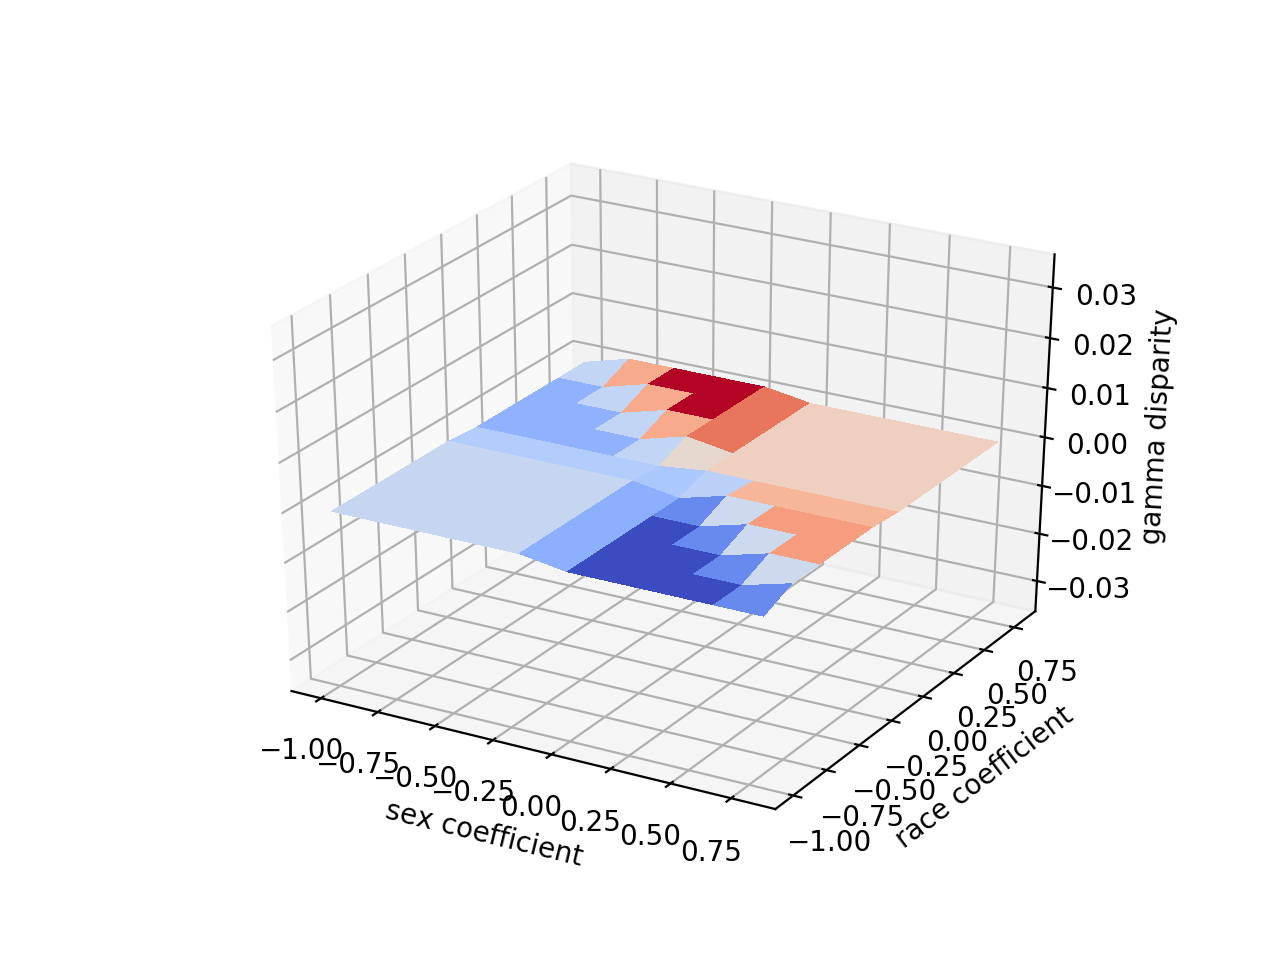

> /Users/sethneel/PycharmProjects/AIF360/aif360/algorithms/inprocessing/gerryfair/heatmap.py(56)heat_map()
-> if plot_path is not None:
(Pdb) c


(None, None)

In [6]:

# output heatmap (brute force)
# replace None with the relative path if you want to save the plot
fair_model.heatmapflag = True
fair_model.save_heatmap(fair_model.max_iters, data_set, dataset_yhat.labels, None, None)





In [8]:
# auditing a classifier for unfairness
# instantiate auditor
auditor = Auditor(data_set, 'FP')
group = auditor.get_group(dataset_yhat.labels, auditor.get_baseline(array_to_tuple(data_set.labels), array_to_tuple(dataset_yhat.labels)))
print('gamma disparity: {}'.format(group.weighted_disparity))






gamma disparity: 0.00255


In [9]:
# run & create pareto curves
fair_model.max_iters = 10
fair_model.printflag = False
gamma_list = [.01, .02, .03, 1.0]
fair_model.pareto(data_set, gamma_list)



iteration: 1
most accurate classifier error: 0.245, most accurate class unfairness: 0.038950000000000005, violated group size: 0.245
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 1
most accurate classifier error: 0.245, most accurate class unfairness: 0.038950000000000005, violated group size: 0.245
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 1
most accurate classifier error: 0.245, most accurate class unfairness: 0.038950000000000005, violated group size: 0.245
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 1
most accurate classifier error: 0.245, most accurate class unfairness: 0.038950000000000005, violated group size: 0.245
iteration: 2
iteration: 3
iteration: 4
iteration: 5


([0.4272222222222223, 0.38833333333333336, 0.38833333333333336, 0.245],
 [0.0043277777777777785,
  0.005744444444444447,
  0.005744444444444447,
  0.038950000000000005],
 [0.010500000000000013,
  0.02625000000000001,
  0.02625000000000001,
  0.019000000000000003])

In [ ]:
def multiple_classifiers_pareto(dataset, gamma_list=[0.002, 0.005, 0.01, 0.02, 0.05, 0.1], save_results=False):

    ln_predictor = linear_model.LinearRegression()
    svm_predictor = svm.LinearSVR()
    tree_predictor = tree.DecisionTreeRegressor(max_depth=3)
    kernel_predictor = KernelRidge(alpha=1.0, gamma=1.0, kernel='rbf')
    predictor_dict = {'Linear': {'predictor': ln_predictor, 'iters': 10},
                      'SVR': {'predictor': svm_predictor, 'iters': 10},
                      'Tree': {'predictor': tree_predictor, 'iters': 10},
                      'Kernel': {'predictor': kernel_predictor, 'iters': 10}}

    results_dict = {}

    for pred in predictor_dict:
        print('Curr Predictor: {}'.format(pred))
        predictor = predictor_dict[pred]['predictor']
        max_iters = predictor_dict[pred]['iters']
        fair_clf = Model(C=100, printflag=True, gamma=1, predictor=predictor, max_iters=max_iters)
        fair_clf.set_options(max_iters=max_iters)
        errors, fp_violations, fn_violations = fair_clf.pareto(dataset, gamma_list)
        results_dict[pred] = {'errors': errors, 'fp_violations': fp_violations, 'fn_violations': fn_violations}
        plt.plot(errors, fp_violations, label=pred)

    if save_results:
        pickle.dump(results_dict, open('results_dict_' + str(gamma_list) + '_gammas' + str(gamma_list) + '.pkl', 'wb'))

    plt.xlabel('Error')
    plt.ylabel('Unfairness')
    plt.legend()
    plt.title('Error vs. Unfairness\n(Communities & Crime Dataset)')
    plt.show()
    
    
multiple_classifiers_pareto(data_set)

In [ ]:

def fp_vs_fn(dataset, fair_model, gamma_list):
    fp_auditor = Auditor(dataset, 'FP')
    fn_auditor = Auditor(dataset, 'FN')
    fp_violations = []
    fn_violations = []
    for g in gamma_list:
        fair_model.set_options(gamma=g)
        fair_model.fit(dataset)
        predictions = (fair_model.predict(dataset)).labels
        predictions_inv = [abs(1 - p) for p in predictions]
        _, fp_diff = fp_auditor.audit(predictions)
        _, fn_diff = fn_auditor.audit(predictions_inv)
        fp_violations.append(fp_diff)
        fn_violations.append(fn_diff)

    print((fp_violations, fn_violations))

    plt.plot(fp_violations, fn_violations, label='communities')
    plt.xlabel('False Positive Disparity')
    plt.ylabel('False Negative Disparity')
    plt.legend()
    plt.title('FP vs FN Unfairness')
    plt.show()
    
C = 10
print_flag = True
gamma = .01
max_iterations = 10
fair_def = 'FP'
fair_model = Model(C=C, printflag=print_flag, gamma=gamma, fairness_def=fair_def,
             max_iters=max_iterations)
data_set = load_preproc_data_adult(sub_samp=50)
gamma_list = [0.001, 0.002, 0.003, 0.004, 0.005, 0.0075, 0.01, 0.02, 0.03, 0.05]
fp_vs_fn(data_set, fair_model, gamma_list)